**Презентация ПДФ с ответами на вопросы:**
    https://drive.google.com/file/d/1ECFCJcvOIQ_Hp8nz7x3iwEqgIvE13Yme/view?usp=drive_link

**Ссылка на дашборд:**
                 https://public.tableau.com/app/profile/artur.kamalov/viz/Sbornik2v_1/Story1?publish=yes

In [1]:
import os
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# путь к БД на вашем компьютере (например, в той же папке, что и тетрадь)
path_to_db_local = 'telecomm_csi.db'
# путь к БД на платформе
path_to_db_platform = '/datasets/telecomm_csi.db'
# итоговый путь к БД
path_to_db = None

# если путь на вашем компьютере ведёт к БД, то он становится итоговым
if os.path.exists(path_to_db_local):
    path_to_db = path_to_db_local
# иначе: если путь на платформе ведёт к БД, то он становится итоговым
elif os.path.exists(path_to_db_platform):
    path_to_db = path_to_db_platform
# иначе выводится сообщение о том, что файл не найден
else:
    raise Exception('Файл с базой данных SQLite не найден!')

In [4]:
# если итоговый путь не пустой
if path_to_db:
    # то создаём подключение к базе
    engine = create_engine(f'sqlite:///{path_to_db}', echo=False)
    
    # пример запроса
    query = """
    SELECT 
        u.user_id, 
        CASE 
        WHEN u.gender_segment = 1 THEN 'female'
        WHEN u.gender_segment = 0 THEN 'male'
        ELSE 'unknown' END
        AS gender_segment,
        
        u.lt_day, 
        CASE
        WHEN u.lt_day <= 365 THEN 1
        WHEN u.lt_day > 365 THEN 0
        END
        AS is_new,
        
        u.age,
        u.os_name,
        u.cpe_type_name,
        u.nps_score,
        
        CASE 
        WHEN u.nps_score >= 9 THEN 'сторонники'
        WHEN u.nps_score >= 7 AND u.nps_score <= 8 THEN 'нейтралы'
        ELSE 'критики'
        END AS nps_group,

        
        l.country,
        l.city,
        
        SUBSTRING(age_segment.title, 3) as age_segment,
        SUBSTRING(traffic_segment.title, 3) as traffic_segment,
        SUBSTRING(lifetime_segment.title, 3) as lifetime_segment
        
    FROM user u
    LEFT JOIN location l ON u.location_id=l.location_id
    LEFT JOIN age_segment ON u.age_gr_id=age_segment.age_gr_id
    LEFT JOIN traffic_segment ON u.tr_gr_id=traffic_segment.tr_gr_id
    LEFT JOIN lifetime_segment ON u.lt_gr_id=lifetime_segment.lt_gr_id;
    """
    
    # создаём датафрейм по данным запроса
    df = pd.read_sql(query, engine) 

In [5]:
df.head()

,user_id,gender_segment,lt_day,is_new,age,os_name,cpe_type_name,nps_score,nps_group,country,city,age_segment,traffic_segment,lifetime_segment
0,A001A2,female,2320,0,45.0,ANDROID,SMARTPHONE,10,сторонники,Россия,Уфа,45-54,1-5,36+
1,A001WF,male,2344,0,53.0,ANDROID,SMARTPHONE,10,сторонники,Россия,Киров,45-54,1-5,36+
2,A003Q7,male,467,0,57.0,ANDROID,SMARTPHONE,10,сторонники,Россия,Москва,55-64,20-25,13-24
3,A004TB,female,4190,0,44.0,IOS,SMARTPHONE,10,сторонники,Россия,РостовнаДону,35-44,0.1-1,36+
4,A004XT,male,1163,0,24.0,ANDROID,SMARTPHONE,10,сторонники,Россия,Рязань,16-24,5-10,36+


In [6]:
df.to_csv('telecomm_tableau_rev1.csv')

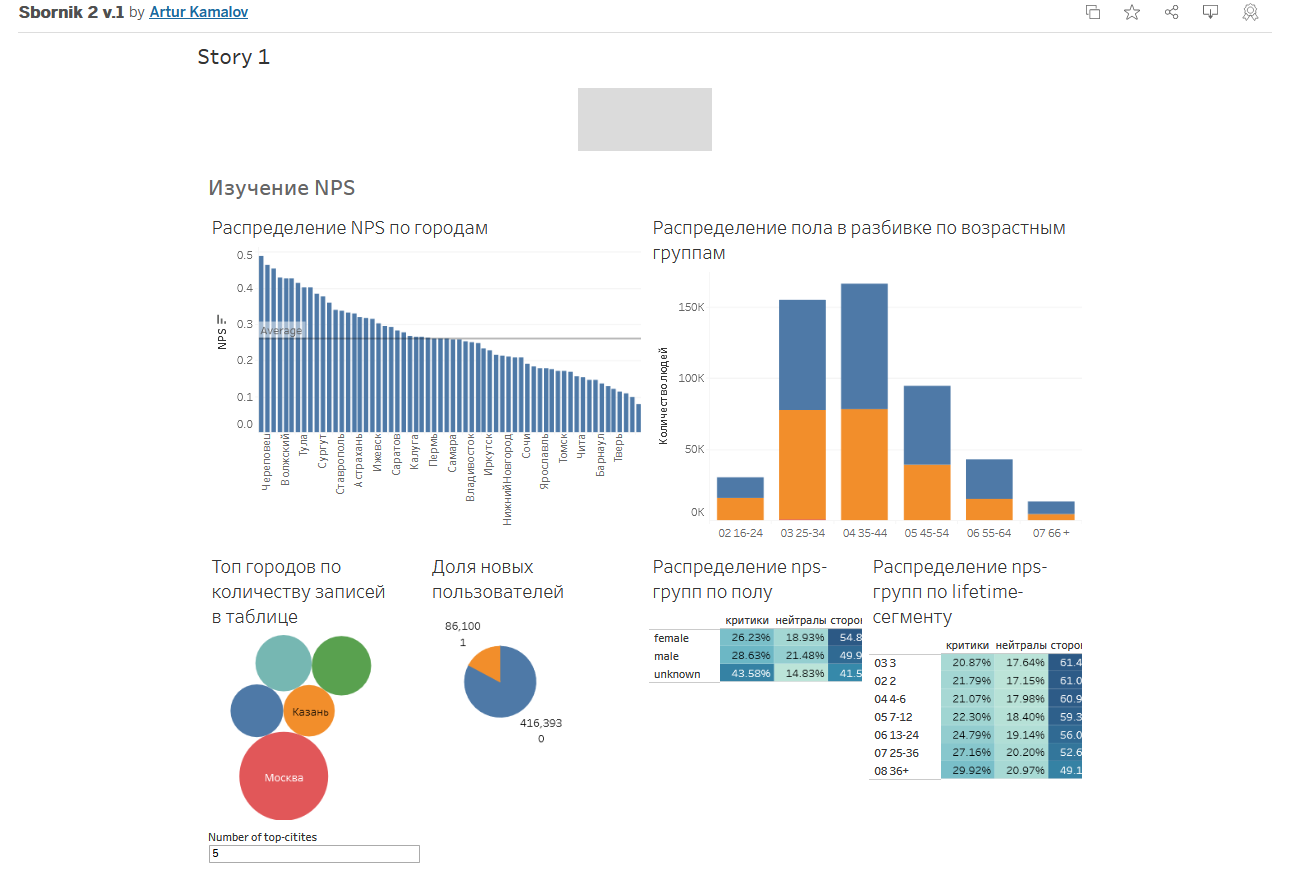